In [91]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.font_manager

In [92]:
df = pd.read_csv('../data/measuredAngles.csv')
df.head(9)

,Blade No.,Measured Angles
0,1,1.780078
1,2,1.909625
2,3,1.714951
3,4,1.797712
4,5,1.750724
5,6,2.028946
6,7,1.882012
7,8,1.710417
8,9,2.008980


In [93]:
df['Measured Angles'].std()

0.12071895944403267

In [94]:
df['Measured Angles'].mean()

1.842605

In [95]:
data_points = 8

In [96]:
df.index

RangeIndex(start=0, stop=9, step=1)

In [97]:
colors = np.array([0, 10, 20, 30, 40, 45, 50, 55, 60])

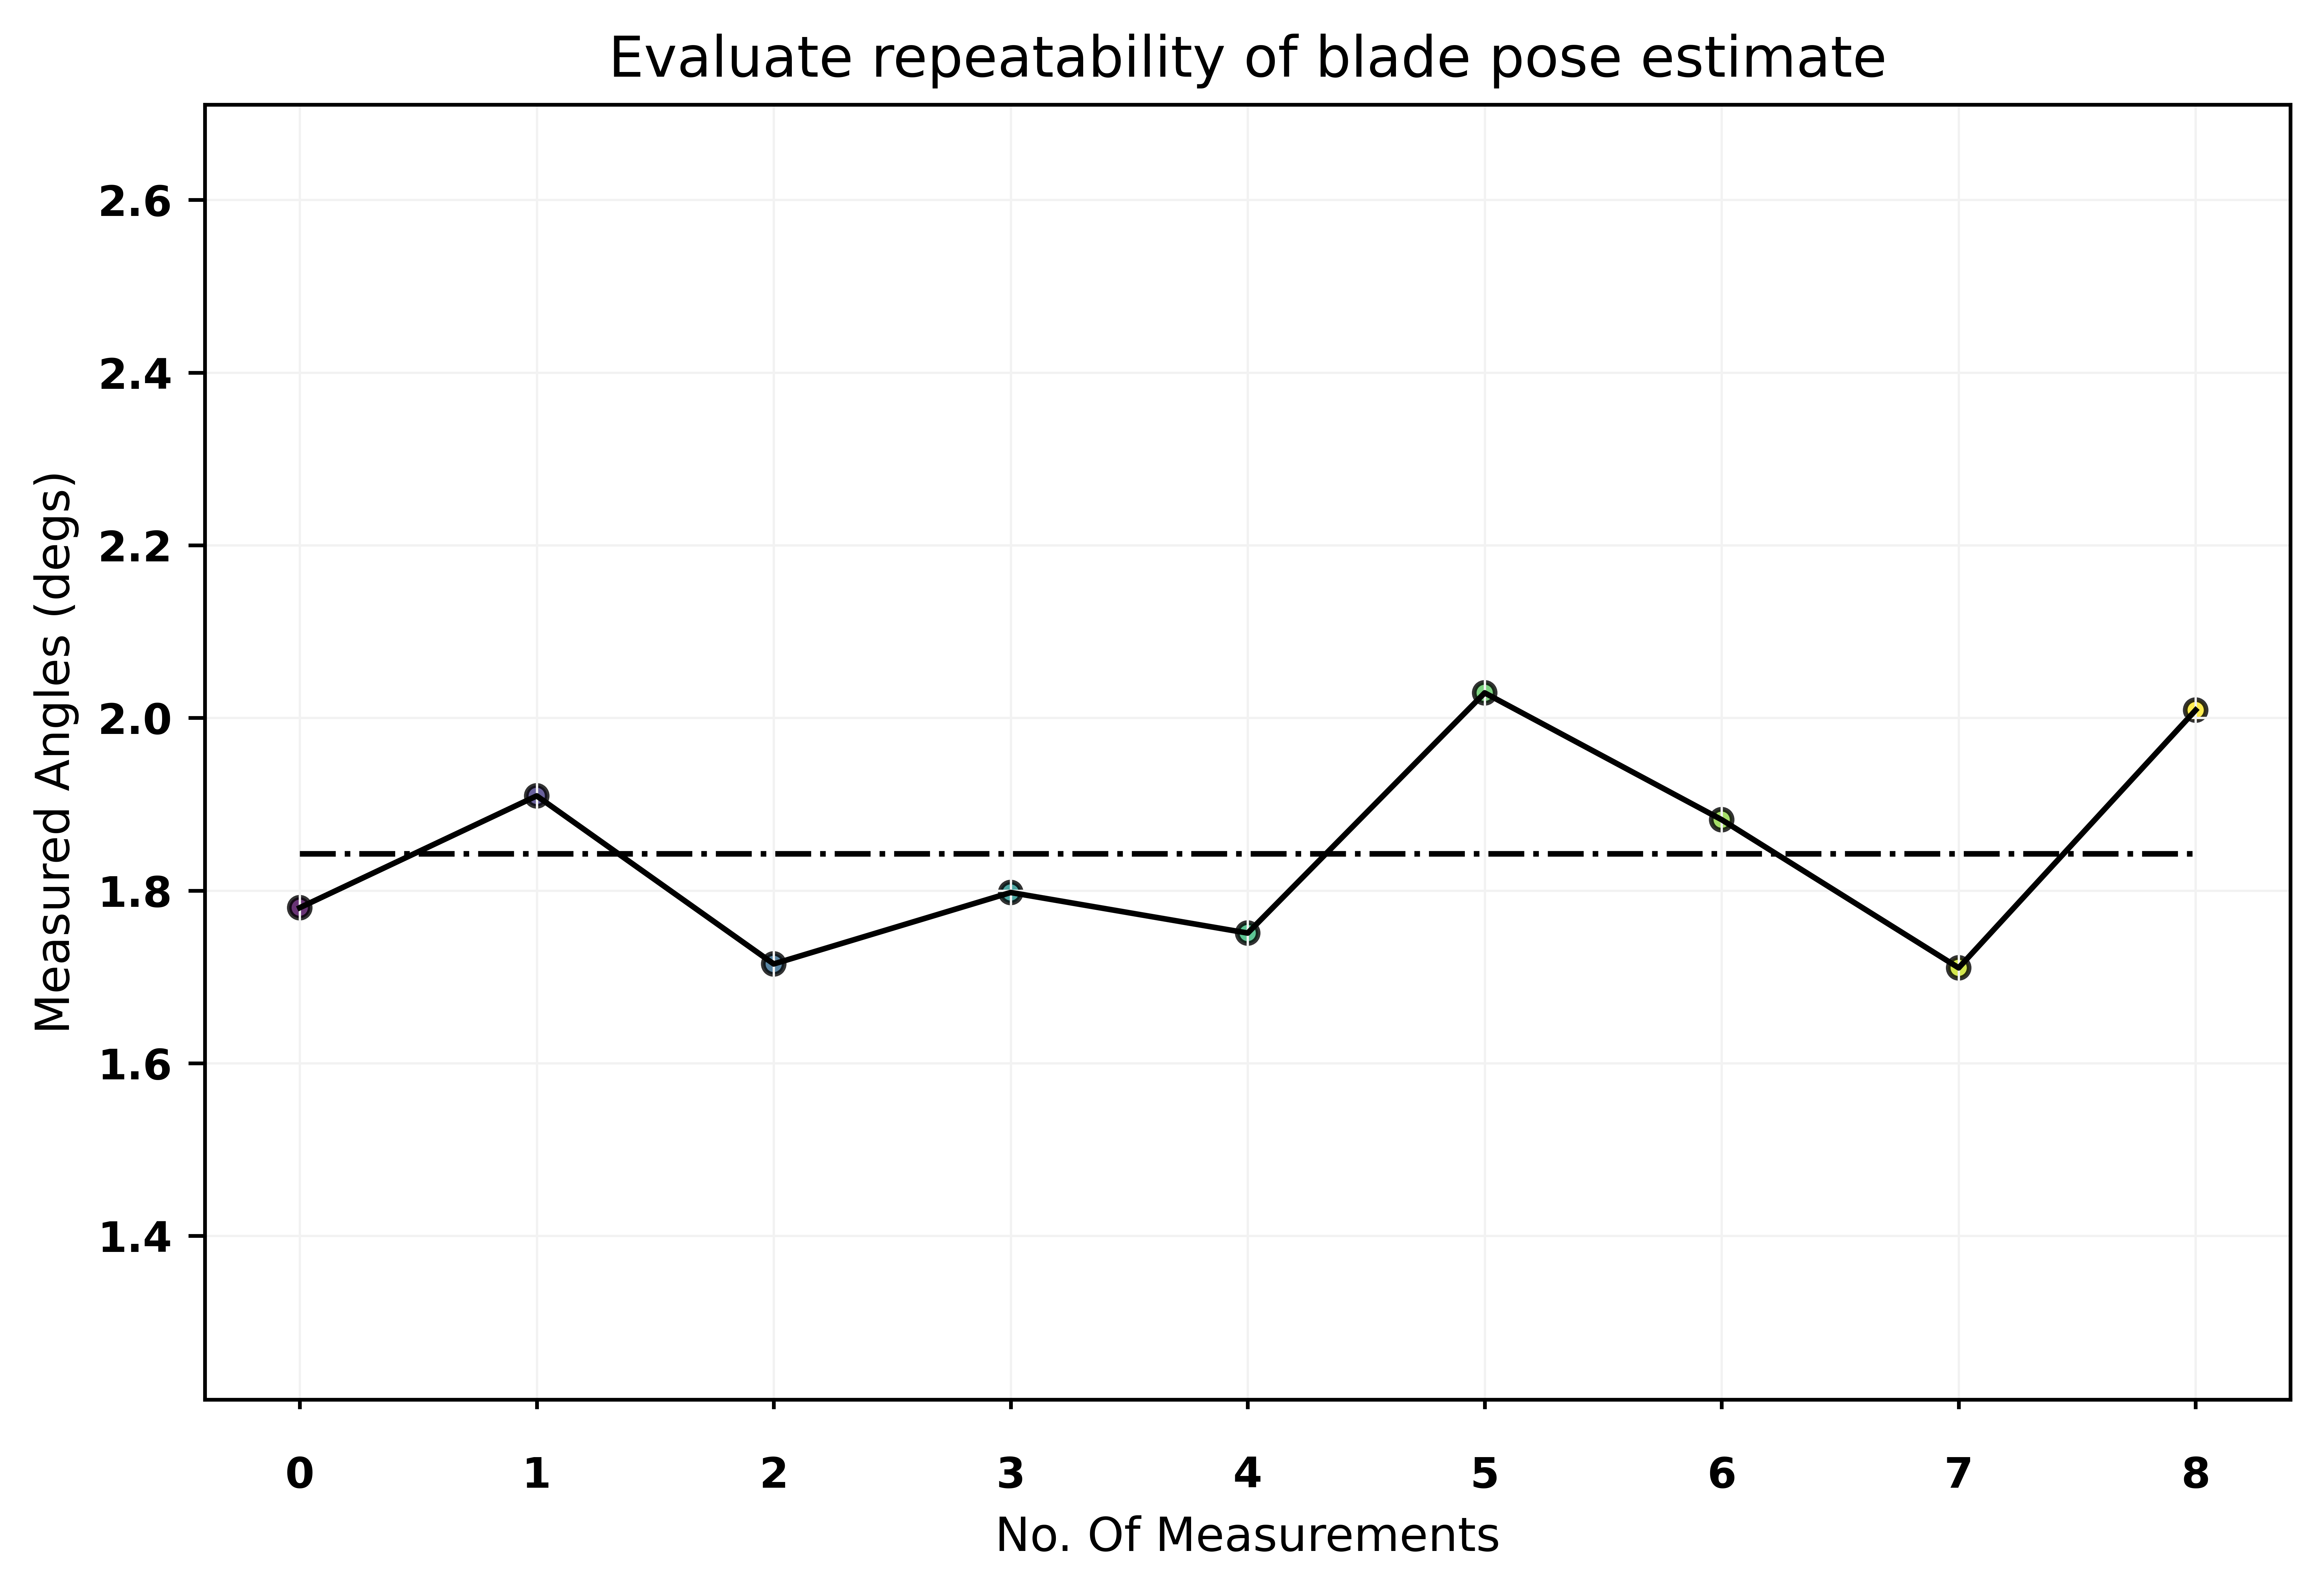

In [98]:
plt.rcParams.update({
    "font.weight": "bold",
    "xtick.major.size": 2,
    "xtick.major.pad": 10,
    "ytick.labelsize": 9,
    "xtick.labelsize": 9,
    "grid.color": "0.5",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5,
    "lines.linewidth": 1.2,
    "lines.color": "g",
    
})
x=df.index 
y=df['Measured Angles']
plt.figure(figsize=(8,5),dpi=1000)
plt.title("Evaluate repeatability of blade pose estimate") # Title
plt.ylim(df['Measured Angles'].min()-0.5,df['Measured Angles'].min()+ 1) # Setting y limits
plt.scatter(x,y, s=20,c=colors,cmap = 'viridis',marker="o",alpha=0.8,edgecolors='Black'); # Plotting scatter
plt.plot(x,y,ls='-',c='black')
plt.hlines(y=df['Measured Angles'].mean(), xmin=0, xmax=data_points,colors='Black',linestyles='dashdot') # Mean
plt.xlabel("No. Of Measurements", fontsize=10)
plt.ylabel("Measured Angles (degs)", fontsize=10)
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
# for std_int in [-2*0.12, -1*0.12, 1*0.12, 2*0.12]: # Going through different stds from the mean
#     standard_deviation = df['Measured Angles'].mean() + df['Measured Angles'].std()*std_int
    
#     plt.hlines(y=standard_deviation,
#                xmin=0,
#                xmax=data_points,
#                linestyles='dotted',
#                colors='gray',); # 1 std above
    
#     # Giving labels to the lines we just drew
#     plt.text(y=standard_deviation , x=-0.2, s=std_int, ha='center')

In [99]:
d = np.array([0.00743252-0.00683499, -0.781734+0.7818 ,0.860328-0.860413])


In [100]:
import math 

In [101]:
x = -0.01929 
y = -0.02821
z = 0.9995
sqrt = math.sqrt(x**2 + y**2 + z**2)
normalizedVectorx = x/sqrt 
normalizedVectory = y/sqrt
normalizedVectorz = z/sqrt
normalizedVector = np.array([normalizedVectorx,normalizedVectory,normalizedVectorz])
normalizedVector

array([-0.01928838, -0.02820763,  0.99941597])

In [102]:
final = np.dot(d,normalizedVector)
final 

-9.833744592361146e-05

In [103]:
df2 = pd.read_csv("../data/offsetCalc.csv")
df2.head()

,Offset Calculation
0,0.000011
1,0.000008
2,0.000004
3,0.000010
4,0.000006


In [104]:
df2['Offset Calculation']= df2['Offset Calculation'] * 1000

In [105]:
df2.head(10)

,Offset Calculation
0,0.011
1,0.008
2,0.004
3,0.010
4,0.006
5,0.020
6,-0.034
7,-0.091


In [106]:
df2['Offset Calculation'].mean()


-0.00825

In [107]:
df2.shape

(8, 1)

In [108]:
colors = np.array([0, 10, 20, 30, 40, 45, 50,60])

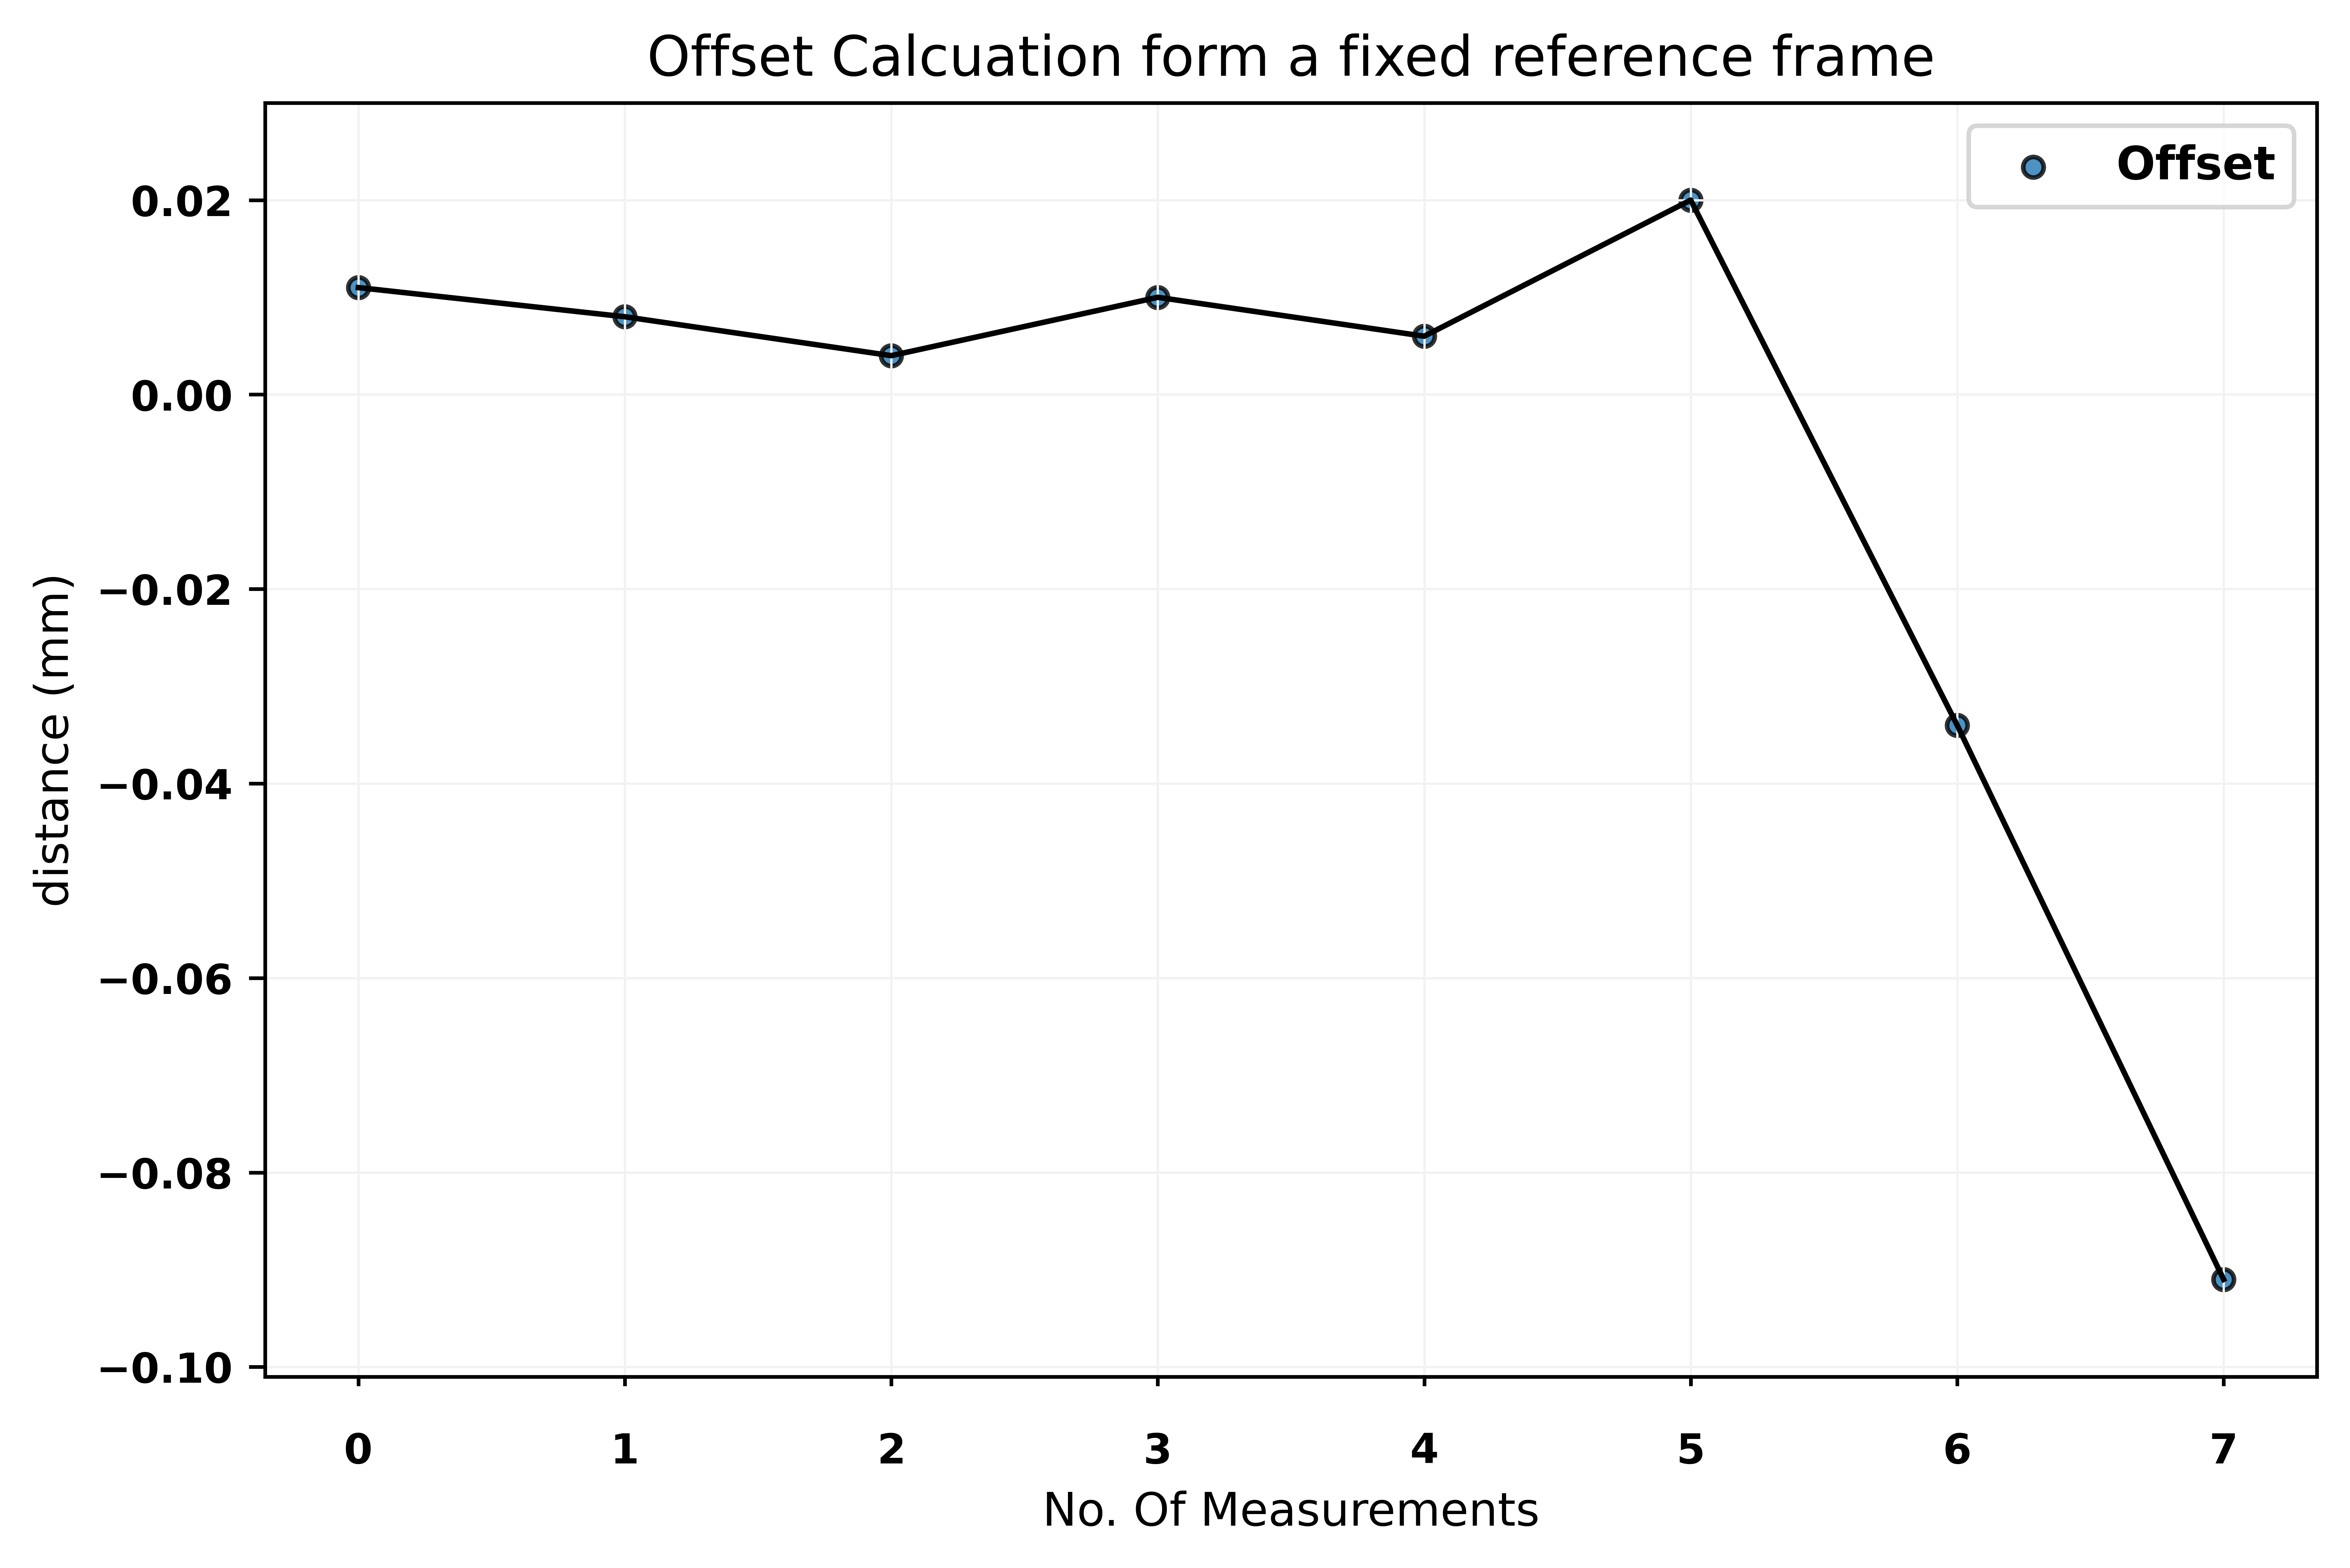

In [109]:
plt.rcParams.update({
    "font.weight": "bold",
    "xtick.major.size": 2,
    "xtick.major.pad": 10,
    "ytick.labelsize": 9,
    "xtick.labelsize": 9,
    "grid.color": "0.5",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5,
    "lines.linewidth": 1.2,
    "lines.color": "g",
    
})
x=df2.index 
y=df2['Offset Calculation']

plt.figure(figsize=(8,5),dpi=1000)
plt.title("Offset Calcuation form a fixed reference frame") # Title
plt.ylim(df2['Offset Calculation'].min() -0.01 ,df2['Offset Calculation'].max()+ 0.01) # Setting y limits
plt.scatter(x,y, s=20,marker="o",alpha=0.8,edgecolors='Black',label="Offset"); # Plotting scatter
# plt.hlines(y=df2['Offset Calculation'].mean(),xmin=0, xmax=7,colors='Black',linestyles='dashdot') # Mean
plt.plot(x, y,ls='-',c='Black')
plt.xlabel("No. Of Measurements", fontsize=10)
plt.ylabel("distance (mm)", fontsize=10)
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
plt.legend()
plt.show()